In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('time_series_covid19_confirmed_US.csv')
af = pd.read_csv('time_series_covid19_deaths_US.csv')
mex = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [2]:
# yuma = (df['Admin2'] == 'Yuma') & (df['Province_State'] == 'Arizona')
az = (df['Admin2'] == 'San Diego') | (df['Admin2'] == 'Los Angeles')
df2 = df.loc[az]

In [3]:
af2 = af.loc[az]

In [4]:
df2.rename(columns={'Admin2':'Dates'}, inplace=True)
df2.set_index('Dates', inplace=True)
df2 = df2.T

C:\Users\jmonz\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
af2.rename(columns={'Admin2':'Dates'}, inplace=True)
af2.set_index('Dates', inplace=True)
af2 = af2.T

In [6]:
df2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS',
          'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], inplace=True)

In [7]:
af2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS',
          'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], inplace=True)

In [8]:
df2['Date'] = df2.index
df2['Date'] = pd.to_datetime(df2['Date'], format= '%m/%d/%y')
df2.set_index('Date', inplace=True)

In [9]:
af2['Date'] = af2.index
af2['Date'] = pd.to_datetime(af2['Date'], format= '%m/%d/%y')
af2.set_index('Date', inplace=True)

In [14]:
#af2
df2

Dates      Los Angeles San Diego
Date                            
2020-03-01           1         2
2020-03-02           1         2
2020-03-03           1         2
2020-03-04           7         2
2020-03-05          11         3
...                ...       ...
2020-05-01       24262      3564
2020-05-02       24894      3711
2020-05-03       25699      3927
2020-05-04       26225      3927
2020-05-05       27836      4020

[66 rows x 2 columns]

In [11]:
df2 = df2[df2.index.month >= 3]
af2 = af2[af2.index.month >= 3]

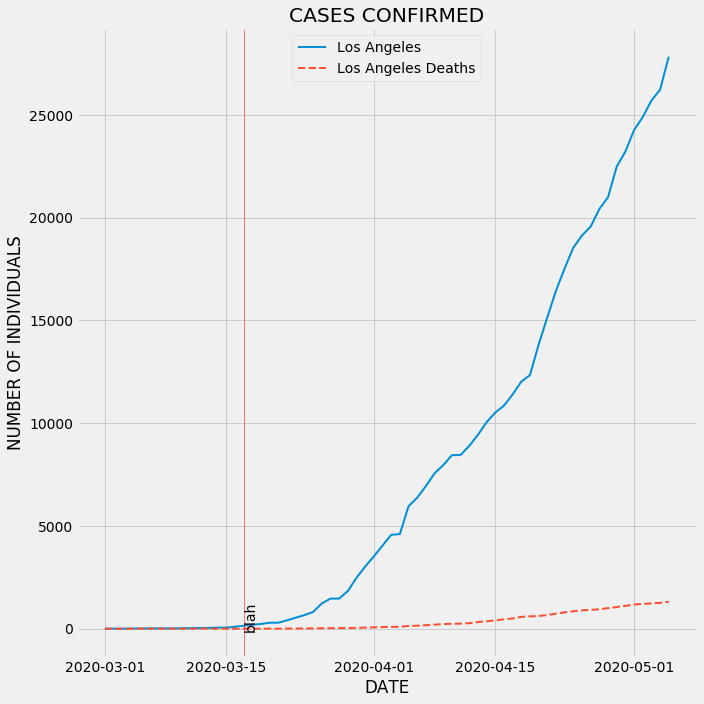

In [33]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add lines
ax.plot(df2.index.values,
         df2['Los Angeles'], linewidth=2, label='Los Angeles')

ax.plot(af2.index.values,
        af2['Los Angeles'], linestyle='--', linewidth=2, label='Los Angeles Deaths')

# ax.plot(df2.index.values,
#        df2['San Diego'], color='blue', linewidth=2, label='San Diego')

# ax.plot(af2.index.values,
#         af2['San Diego'], color='blue', linestyle='--', linewidth=2, label='San Diego')


# Set title and labels for axes
ax.set(xlabel="DATE",
       ylabel="NUMBER OF INDIVIDUALS",
       title="CASES CONFIRMED")

ax.axvline(a, ls='-', color='r', alpha=0.5, linewidth='1')
# ax.text(a,0,'Stay at Home Order',rotation=90)

ax.legend()

plt.tight_layout()

a = '2020-03-17'
# b = '2020-05-05'
# plt.axvspan(a, b, color='y', alpha=0.2, lw=0)

plt.savefig('Los Angeles.png')

plt.show()